## Disease Prediction Using Machine Learning
The data is available on Kaggle; link: https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning

### Content
Complete Dataset consists of 2 CSV files . One of them is training and other is for testing your model.

Each CSV file has 133 columns. 132 of these columns are symptoms that a person experiences and last column is the prognosis.

These symptoms are mapped to 42 diseases you can classify these set of symptoms to.

You are required to train your model on training data and test it on testing data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

#### download dataset directly from Kaggle using !command line argument

In [4]:
!kaggle datasets download -d kaushil268/disease-prediction-using-machine-learning

disease-prediction-using-machine-learning.zip: Skipping, found more recently modified local copy (use --force to force download)


#### unzip the downloaded file

In [5]:
from zipfile import ZipFile
zf = ZipFile('disease-prediction-using-machine-learning.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

#### read the file and check if they are strcutured in the same way

In [6]:
test_set = pd.read_csv('Testing.csv')
train_set = pd.read_csv('Training.csv')

In [7]:
test_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [8]:
train_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


#### drop the unknown column on the right most of the train_set

In [9]:
train_set.drop('Unnamed: 133', axis = 1, inplace = True)

In [10]:
train_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


#### Check the size of the files

In [11]:
print(test_set.shape)
print(train_set.shape)

print(test_set.shape[0]/(train_set.shape[0]+test_set.shape[0])*100)

(42, 133)
(4920, 133)
0.8464328899637243


#### test set is 0.84% of total dataset

#### let's use the train to train the model (it will be split)

In [12]:
df = train_set
df.shape

(4920, 133)

#### drop columns where all value is 0 or 1

In [13]:
df.loc[:, (df == 0).all()]

,fluid_overload
0,0
1,0
2,0
3,0
4,0
...,...
4915,0
4916,0
4917,0
4918,0


In [14]:
df.loc[:, (df == 1).all()]

""
0
1
2
3
4
...
4915
4916
4917
4918


In [15]:
df.drop('fluid_overload', axis = 1, inplace = True)

In [16]:
df.shape

(4920, 132)

#### make sure that all df is numeric

In [17]:
df2 = df.loc[:, df.columns != "prognosis"]

In [18]:
df2.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df2 = df2.apply(pd.to_numeric, errors = 'coerce')

In [20]:
df2.shape

(4920, 131)

In [21]:
df = pd.concat([df2,df['prognosis']], axis=1, join='inner')

In [22]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


#### drop row with NaN value

In [23]:
df = df.dropna()

In [24]:
df.shape

(4920, 132)

## Data visualisation and pre-processing

In [25]:
df['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

<BarContainer object of 131 artists>

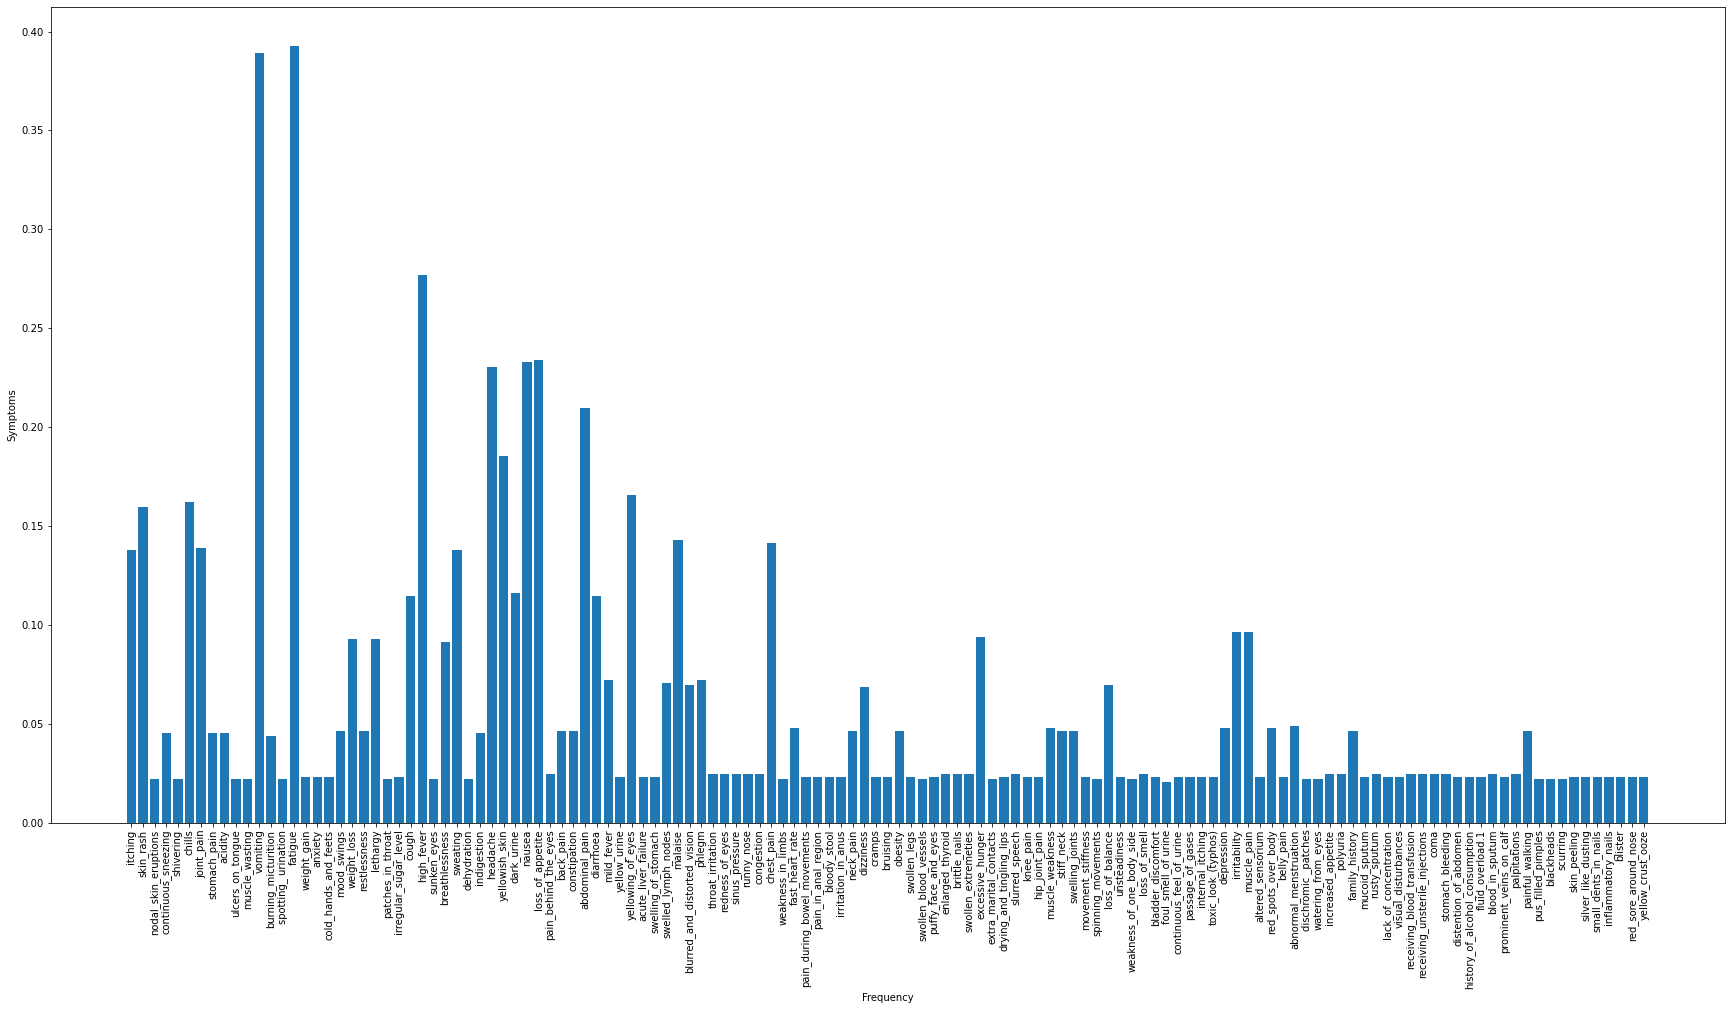

In [26]:
l = []
symp = list(df.drop('prognosis',axis=1))
arr = np.array(symp)
arr2 = np.array(l)
plt.figure(figsize = (30,15))
for i in symp:
    h = df[i].value_counts(normalize=True).values
    arr2 = np.append(arr2,h[1])
plt.xticks(rotation = 90)
plt.xlabel("Frequency")
plt.ylabel("Symptoms")
plt.bar(arr,arr2)

In [27]:
X = df.drop('prognosis',axis=1)
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y = df['prognosis'].values
y[0:5]

array(['Fungal infection', 'Fungal infection', 'Fungal infection',
       'Fungal infection', 'Fungal infection'], dtype=object)

#### normalise X

In [29]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 2.50132708,  2.29336913,  6.6749948 , -0.2173802 , -0.14981285,
        -0.43999471, -0.40183714, -0.2173802 , -0.2173802 , -0.14981285,
        -0.14981285, -0.79795147, -0.21428571, -0.14981285, -0.80410593,
        -0.15401412, -0.15401412, -0.15401412, -0.22043899, -0.31960998,
        -0.22043899, -0.31960998, -0.14981285, -0.15401412, -0.35982855,
        -0.61870779, -0.14981285, -0.31728716, -0.39978778, -0.14981285,
        -0.2173802 , -0.54728837, -0.47701668, -0.36198685, -0.55105045,
        -0.55293081, -0.15811388, -0.22043899, -0.22043899, -0.51520103,
        -0.35982855, -0.27844132, -0.15401412, -0.44590404, -0.15401412,
        -0.15401412, -0.27589035, -0.40795783, -0.27332236, -0.27844132,
        -0.15811388, -0.15811388, -0.15811388, -0.15811388, -0.15811388,
        -0.40592207, -0.14981285, -0.2234636 , -0.15401412, -0.15401412,
        -0.15401412, -0.15401412, -0.22043899, -0.27073683, -0.15401412,
        -0.15401412, -0.22043899, -0.15401412, -0.1

## K Nearest Neighbor(KNN)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.01,random_state=0)

print("X_train size :", X_train.shape, "  y_train size :", y_train.shape)
print("X_test size  :", X_test.shape, "  y_test size  :", y_test.shape)

X_train size : (4870, 131)   y_train size : (4870,)
X_test size  : (50, 131)   y_test size  : (50,)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks=20
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat_KNN = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat_KNN)
    std_acc[n-1] = np.std(y_hat_KNN == y_test)/np.sqrt(y_hat_KNN.shape[0])

print('best accuracy :', mean_acc.max(), ' |  Best K is:', mean_acc.argmax()+1)

best accuracy : 1.0  |  Best K is: 1


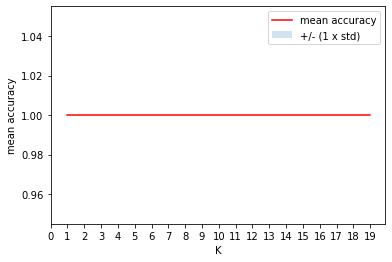

In [32]:
plt.plot(range(1,Ks), mean_acc, 'r')
plt.fill_between(range(1,Ks), mean_acc-(1*std_acc), mean_acc+(1*std_acc), alpha=0.2)

plt.xticks(np.arange(0,Ks, step=1))
plt.legend(("mean accuracy","+/- (1 x std)"))
plt.xlabel("K")
plt.ylabel("mean accuracy")
plt.show()

In [33]:
neigh_forTest = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X, y)
neigh_forTest

KNeighborsClassifier(n_neighbors=1)

## Decision Tree

In [34]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X,y,test_size=0.3,random_state=1)

print("X_train size :", X_train_DT.shape, "  y_train size :", y_train_DT.shape)
print("X_test size  :", X_test_DT.shape, "  y_test size  :", y_test_DT.shape)

X_train size : (3444, 131)   y_train size : (3444,)
X_test size  : (1476, 131)   y_test size  : (1476,)


In [35]:
from sklearn.tree import DecisionTreeClassifier
Ks=200
mean_acc=np.zeros((Ks-1))
for n in range(1,Ks):
    DecTree = DecisionTreeClassifier(criterion="entropy", max_depth=n).fit(X_train_DT, y_train_DT)
    pred_Tree = DecTree.predict(X_test_DT)
    mean_acc[n-1] = metrics.accuracy_score(y_test_DT, pred_Tree)

print('best accuracy :', mean_acc.max(), ' |  Best K is:', mean_acc.argmax()+1)

best accuracy : 1.0  |  Best K is: 24


In [36]:
DecTree_forTest = DecisionTreeClassifier(criterion="entropy", max_depth=mean_acc.argmax()+1).fit(X, y)
DecTree_forTest

DecisionTreeClassifier(criterion='entropy', max_depth=24)

## Support Vector Machine

In [37]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X,y,test_size=0.3,random_state=2)

print("X_train size :", X_train_SVM.shape, "  y_train size :", y_train_SVM.shape)
print("X_test size  :", X_test_SVM.shape, "  y_test size  :", y_test_SVM.shape)

X_train size : (3444, 131)   y_train size : (3444,)
X_test size  : (1476, 131)   y_test size  : (1476,)


In [38]:
from sklearn import svm
from sklearn.metrics import f1_score

kernel =['rbf','poly','linear','sigmoid']
f1score=np.zeros(len(kernel))
                  
for i,k in enumerate(kernel):
    clf = svm.SVC(kernel=k)
    clf.fit(X_train_SVM, y_train_SVM)
    y_hat_SVM = clf.predict(X_test_SVM)
    f1score[i]=f1_score(y_test_SVM, y_hat_SVM, average='weighted')

print('best f1_score :', f1score.max(), ' |  Best K is:', kernel[f1score.argmax()])

best f1_score : 1.0  |  Best K is: linear


In [39]:
clf_forTest = svm.SVC(kernel=kernel[f1score.argmax()]).fit(X, y)
clf_forTest

SVC(kernel='linear')

## Logsitic Regression

In [40]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X,y,test_size=0.3,random_state=3)

print("X_train size :", X_train_LR.shape, "  y_train size :", y_train_LR.shape)
print("X_test size  :", X_test_LR.shape, "  y_test size  :", y_test_LR.shape)

C=np.arange(1,0.001, step=-0.001).tolist()

X_train size : (3444, 131)   y_train size : (3444,)
X_test size  : (1476, 131)   y_test size  : (1476,)


In [41]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train_LR, y_train_LR)
yhat = LR.predict(X_test_LR)
mean_acc = metrics.accuracy_score(y_test_LR, yhat)

print('best accuracy :', mean_acc, ' |  Best c is:', )

best accuracy : 1.0  |  Best c is:


In [42]:
LR_forTest = LogisticRegression().fit(X, y)
LR_forTest

LogisticRegression()

## Evaluation

#### now it's time to use the test set

In [43]:
test_df = test_set
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [44]:
test_df.loc[:, (test_df == 0).all()]

,fluid_overload
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [45]:
test_df2 = test_df.loc[:, test_df.columns != "prognosis"]
test_df2 = test_df2.apply(pd.to_numeric, errors = 'coerce')
test_df = pd.concat([test_df2,test_df['prognosis']], axis=1, join='inner')
test_df = test_df.dropna()

In [46]:
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


#### firstly, try without fluid overload

In [47]:
test_df_no_fluid = test_df.drop('fluid_overload', axis = 1)

In [48]:
test_df_no_fluid.shape

(42, 132)

In [49]:
Feature_test_no_fluid = test_df_no_fluid.drop('prognosis',axis=1)
Feature_test_no_fluid.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_testing_no_fluid = preprocessing.StandardScaler().fit(Feature_test_no_fluid).transform(Feature_test_no_fluid)
X_testing_no_fluid = np.nan_to_num(X_testing_no_fluid)
X_testing_no_fluid.shape

(42, 131)

In [51]:
y_testing = test_df['prognosis'].values
y_testing.shape

(42,)

In [52]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [53]:
#KNN
y_hat_KNN_test_no_fluid = neigh_forTest.predict(X_testing_no_fluid)
print("KNN_f1_score :",f1_score(y_testing, y_hat_KNN_test_no_fluid, average='weighted'))
print("KNN_jaccard  :", jaccard_score(y_testing, y_hat_KNN_test_no_fluid, average='weighted'))
print("\n")

#Decision Tree
y_hat_DecTree_test_no_fluid = DecTree_forTest.predict(X_testing_no_fluid)
print("DecTree_f1_score :",f1_score(y_testing, y_hat_DecTree_test_no_fluid, average='weighted'))
print("DecTree_jaccard  :", jaccard_score(y_testing, y_hat_DecTree_test_no_fluid, average='weighted'))
print("\n")

#SVM
y_hat_SVM_test_no_fluid = clf_forTest.predict(X_testing_no_fluid)
print("SVM_f1_score :",f1_score(y_testing, y_hat_SVM_test_no_fluid, average='weighted'))
print("SVM_jaccard  :", jaccard_score(y_testing, y_hat_SVM_test_no_fluid, average='weighted'))
print("\n")

#Logistic Regression
y_hat_LR_test_no_fluid = LR_forTest.predict(X_testing_no_fluid)
y_hat_LR_test_prob_no_fluid = LR_forTest.predict_proba(X_testing_no_fluid)
print("LR_f1_score :",f1_score(y_testing, y_hat_LR_test_no_fluid, average='weighted'))
print("LR_jaccard  :", jaccard_score(y_testing, y_hat_LR_test_no_fluid, average='weighted'))
print("LR_LogLoss  :", log_loss(y_testing, y_hat_LR_test_prob_no_fluid))

KNN_f1_score : 0.9761904761904762
KNN_jaccard  : 0.9642857142857143


DecTree_f1_score : 1.0
DecTree_jaccard  : 1.0


SVM_f1_score : 1.0
SVM_jaccard  : 1.0


LR_f1_score : 0.9761904761904762
LR_jaccard  : 0.9642857142857143
LR_LogLoss  : 0.05735927562850156


#### Decision Tree (with max_depth of 24 and criterion entropy) and SVM (default setup) are the best supervised classification method to make prediction for this problem with the accuracy of 100%